In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
uploaded = files.upload()

Saving student-por.csv to student-por.csv


In [ ]:
df = pd.read_csv("./student-por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


Параетры:

1 School - школа для учащихся ("GP" - Габриэль Перейра или "MS" - Мусиньо да Силвейра)

2 Sex - пол студента ("F" - женский или "M" - мужской)

3 Age - возраст студента (числовой: от 15 до 22 лет)

4 Address - тип домашнего адреса учащегося ("U" - городской или "R" - сельский)

5 Famsize - размер семьи ('LE3' - меньше или равно 3 или 'GT3' - больше 3)

6 Pstatus - статус совместного проживания родителей ("T" - совместное проживание или "A" - отдельно)

7 Medu - образование матери (0 - нет, 1 - начальное образование (4 класс), 2 - 5-9 классы, 3 - среднее образование или 4 - высшее образование)

8 Fedu - образование отца (0 - нет, 1 - начальное образование (4 класс), 2 - 5-9 класс, 3 - среднее образование или 4 - высшее образование)

9 Mjob - работа матери ("учитель", "медицинское обслуживание", связанные с гражданскими "услугами", "на дому" или "другое")

10 Fjob - работа отца ("учитель", "медицинское обслуживание", связанные с гражданскими "услугами", "на дому" или "другое")

11 Reason - причина выбора этой школы (близость к "дому", "репутация" школы, предпочтения "курса" или "другое")

12 Guardian - опекун учащегося ("мать", "отец" или "другой")

13 Traveltime - время в пути от дома до школы (1 - <15 мин., 2 - от 15 до 30 мин., 3 - 30 мин. до 1 часа или 4 - >1 часа)

14 Studytime - еженедельное учебное время (1 - <2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов или 4 - >10 часов)

15 Failures - количество прошлых сбоев класса (n, если 1<=n<3, иначе 4)

16 Schoolsup - дополнительная образовательная поддержка (да или нет)

17 Famsup - семейная образовательная поддержка (да или нет)

18 Paid - дополнительные оплачиваемые занятия по предмету курса (математика или португальский) (да или нет)

19 Activities - внеклассные мероприятия (да или нет)

20 Nursery - детский сад (да или нет)

21 Higher - хочет получить высшее образование (да или нет)

22 Internet - доступ в Интернет дома (да или нет)

23 Romantic - с романтическими отношениями (да или нет)

24 Famrel - качество семейных отношений (от 1 - очень плохие до 5 - отличные)

25 Freetime - свободное время после школы (от 1 - очень низкое до 5 - очень высокое)

26 Goout - выход с друзьями (от 1 - очень низкое до 5 - очень высокое)

27 Dalc - потребление алкоголя в рабочий день (от 1 - очень низкое до 5 - очень высокое)

28 Walc - потребление алкоголя в выходные дни (от 1 - очень низкое до 5 - очень высокое)

29 Health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)

30 Absences - количество пропусков занятий в школе (от 0 до 93)

31 G1 - оценка за первый период (от 0 до 20)

31 G2 - оценка за второй период (от 0 до 20)

32 G3 - итоговая оценка (от 0 до 20, целевой результат)

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
new_df = df

In [ ]:
new_df['school'] = new_df['school'].replace({'GP':0,'MS':1})
new_df['sex'] = new_df['sex'].replace({'F':0,'M':1})
new_df['address'] = new_df['address'].replace({'U':0,'R':1})
new_df['famsize'] = new_df['famsize'].replace({'GT3':0,'LE3':1})
new_df['Pstatus'] = new_df['Pstatus'].replace({'T':0,'A':1})
new_df['Mjob'] = new_df['Mjob'].replace({'teacher':0,'health':1,'services':2,'at_home':3,'other':4})
new_df['Fjob'] = new_df['Fjob'].replace({'teacher':0,'health':1,'services':2,'at_home':3,'other':4})
new_df['reason'] = new_df['reason'].replace({'home':0,'reputation':1,'course':2,'other':3})
new_df['guardian'] = new_df['guardian'].replace({'mother':0,'father':1,'other':2})
new_df['schoolsup'] = new_df['schoolsup'].replace({'no':0,'yes':1})
new_df['famsup'] = new_df['famsup'].replace({'no':0,'yes':1})
new_df['paid'] = new_df['paid'].replace({'no':0,'yes':1})
new_df['activities'] = new_df['activities'].replace({'no':0,'yes':1})
new_df['nursery'] = new_df['nursery'].replace({'no':0,'yes':1})
new_df['higher'] = new_df['higher'].replace({'no':0,'yes':1})
new_df['internet'] = new_df['internet'].replace({'no':0,'yes':1})
new_df['romantic'] = new_df['romantic'].replace({'no':0,'yes':1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Всего 649 строк данных.

Пропусков нет.

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           16.744222
Medu           2.514638
Fedu           2.306626
traveltime     1.568567
studytime      1.930663
failures       0.221880
famrel         3.930663
freetime       3.180277
goout          3.184900
Dalc           1.502311
Walc           2.280431
health         3.536210
absences       3.659476
G1            11.399076
G2            11.570108
G3            11.906009
dtype: float64

Средние значения.

In [ ]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           17.0
Medu           2.0
Fedu           2.0
traveltime     1.0
studytime      2.0
failures       0.0
famrel         4.0
freetime       3.0
goout          3.0
Dalc           1.0
Walc           2.0
health         4.0
absences       2.0
G1            11.0
G2            11.0
G3            12.0
dtype: float64

Медианы.

Значения сильно не отличаются.

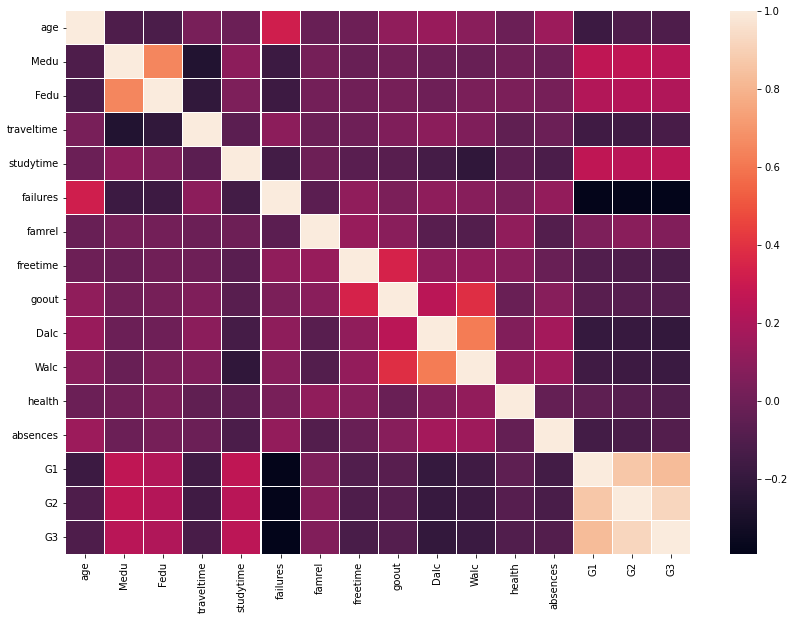

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),vmax=1,linewidth=0.1)
plt.show()

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
def show_unique(df):
    unique = {}
    
    for col in df.columns:
        values = np.sort(df[col].unique())
        unique[col] = [len(values), values]
    
    for col in unique:
        print('Колонка {} имеет {} уникальных значений: {} \n'.format(col, unique[col][0], unique[col][1]))

In [ ]:
show_unique(df)

Колонка school имеет 2 уникальных значений: ['GP' 'MS'] 

Колонка sex имеет 2 уникальных значений: ['F' 'M'] 

Колонка age имеет 8 уникальных значений: [15 16 17 18 19 20 21 22] 

Колонка address имеет 2 уникальных значений: ['R' 'U'] 

Колонка famsize имеет 2 уникальных значений: ['GT3' 'LE3'] 

Колонка Pstatus имеет 2 уникальных значений: ['A' 'T'] 

Колонка Medu имеет 5 уникальных значений: [0 1 2 3 4] 

Колонка Fedu имеет 5 уникальных значений: [0 1 2 3 4] 

Колонка Mjob имеет 5 уникальных значений: ['at_home' 'health' 'other' 'services' 'teacher'] 

Колонка Fjob имеет 5 уникальных значений: ['at_home' 'health' 'other' 'services' 'teacher'] 

Колонка reason имеет 4 уникальных значений: ['course' 'home' 'other' 'reputation'] 

Колонка guardian имеет 3 уникальных значений: ['father' 'mother' 'other'] 

Колонка traveltime имеет 4 уникальных значений: [1 2 3 4] 

Колонка studytime имеет 4 уникальных значений: [1 2 3 4] 

Колонка failures имеет 4 уникальных значений: [0 1 2 3] 

Колонка

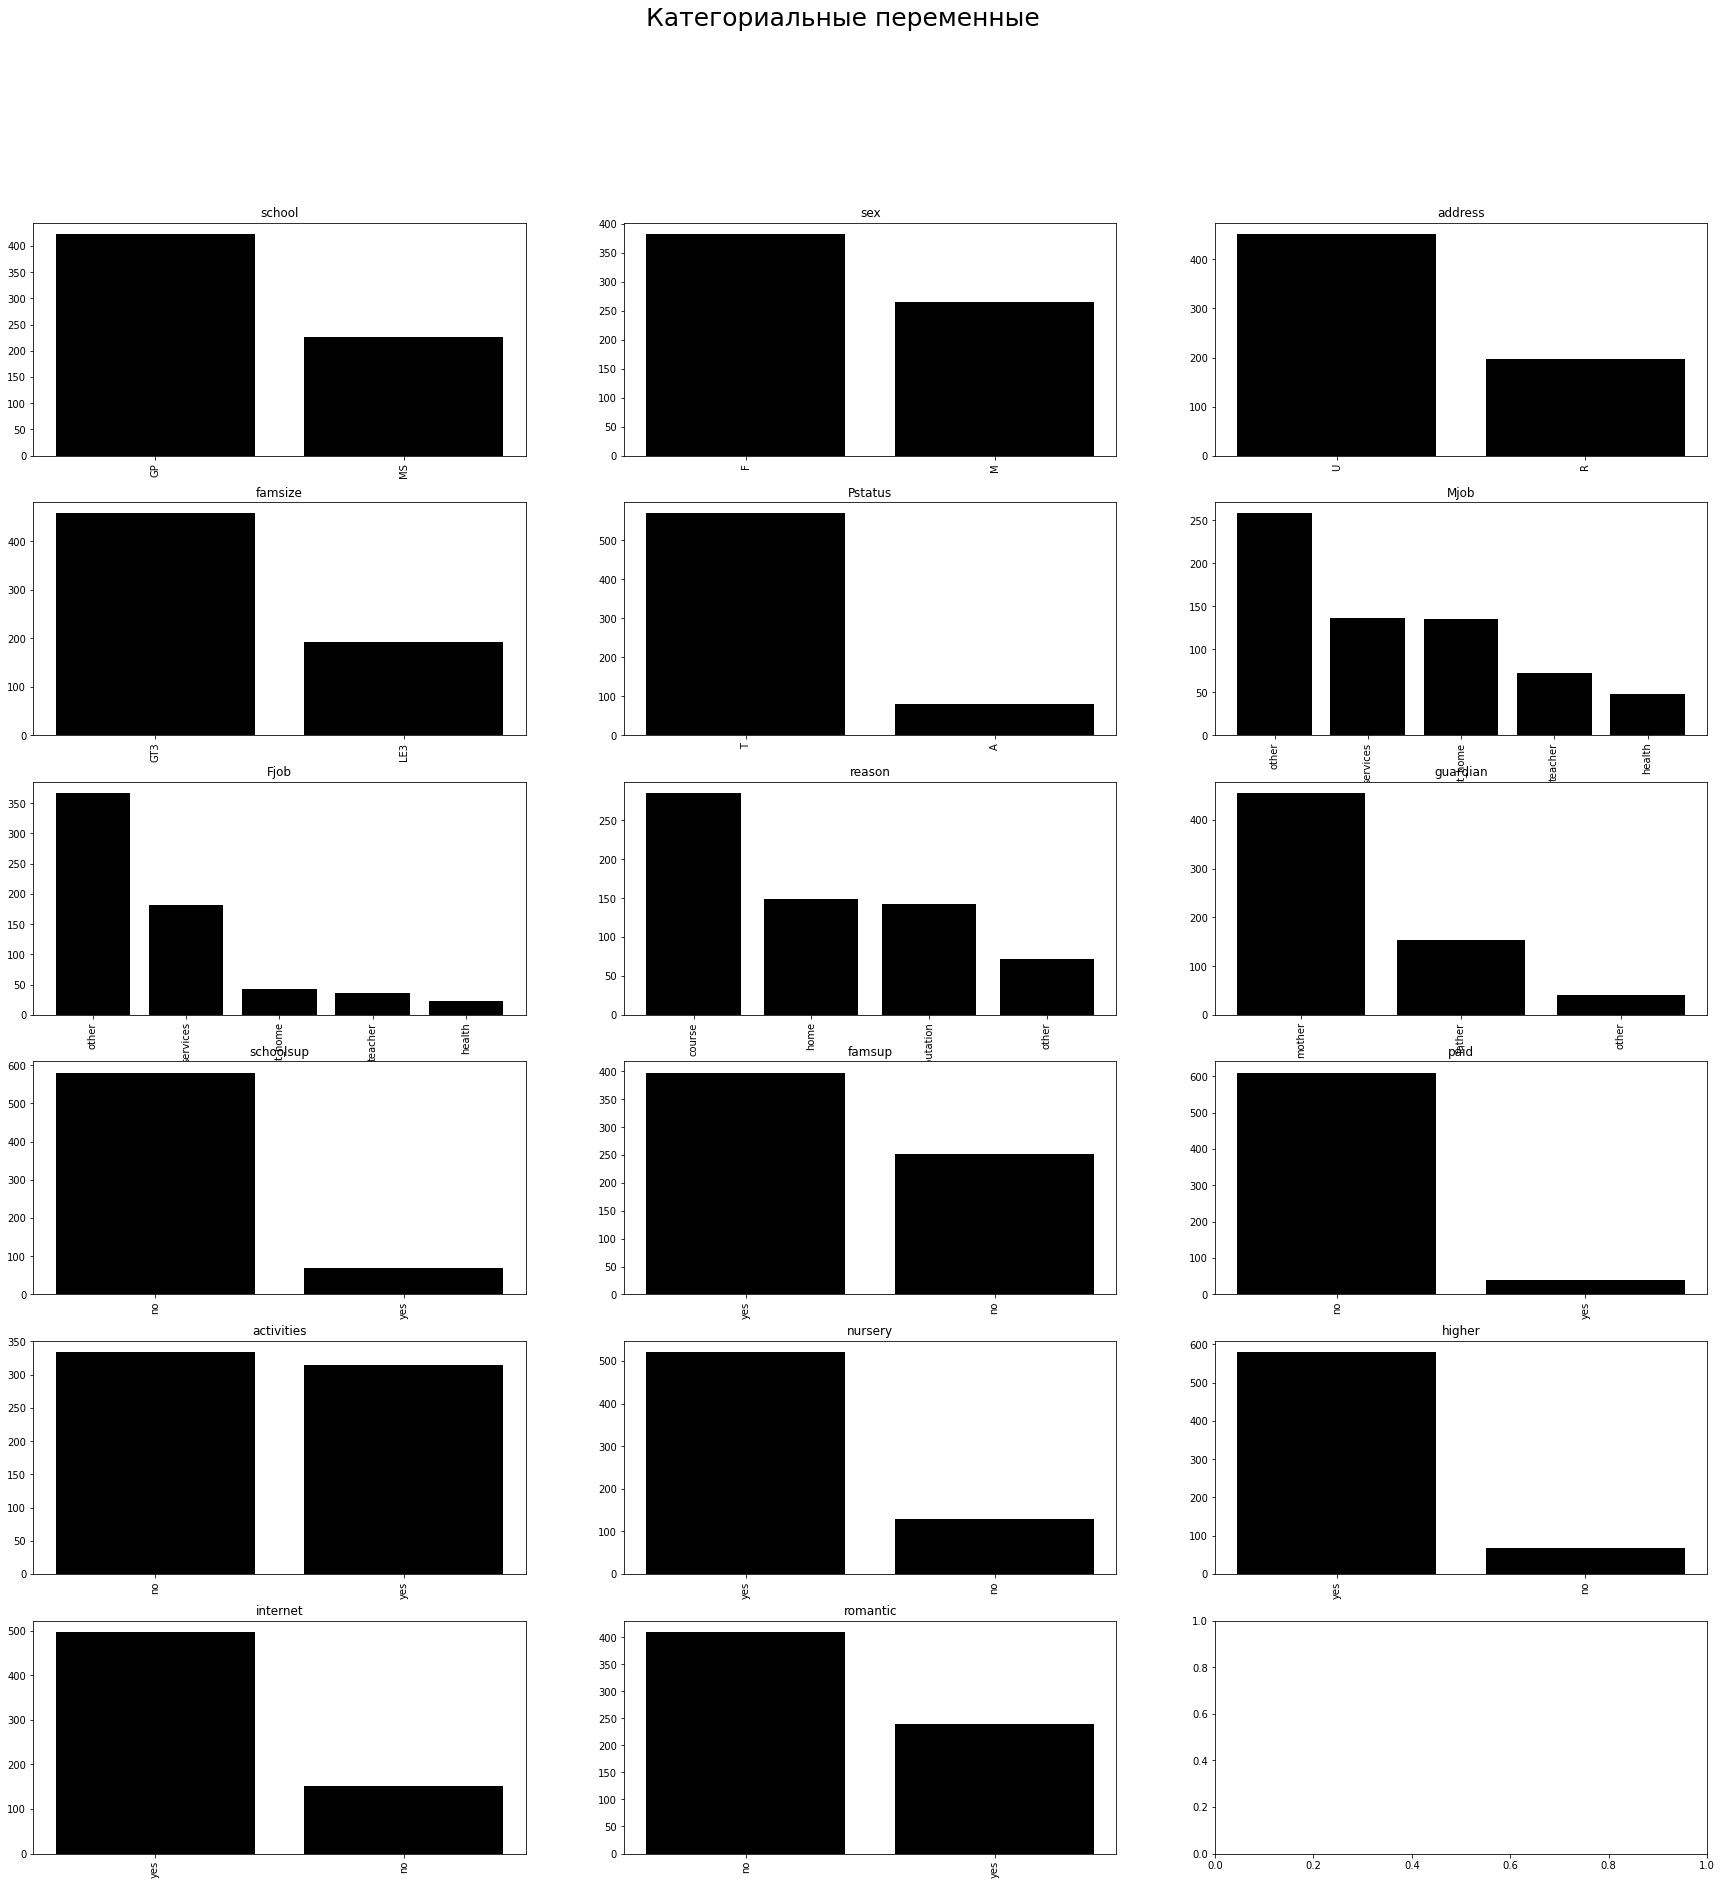

In [ ]:
cat_columns = ['school','sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
fig, axs = plt.subplots(6, 3, sharex=False, sharey=False, figsize=(30, 30))
plt.suptitle('Категориальные переменные', fontsize = 25)
counter = 0
colors = '#000000'
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index, color = colors)
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

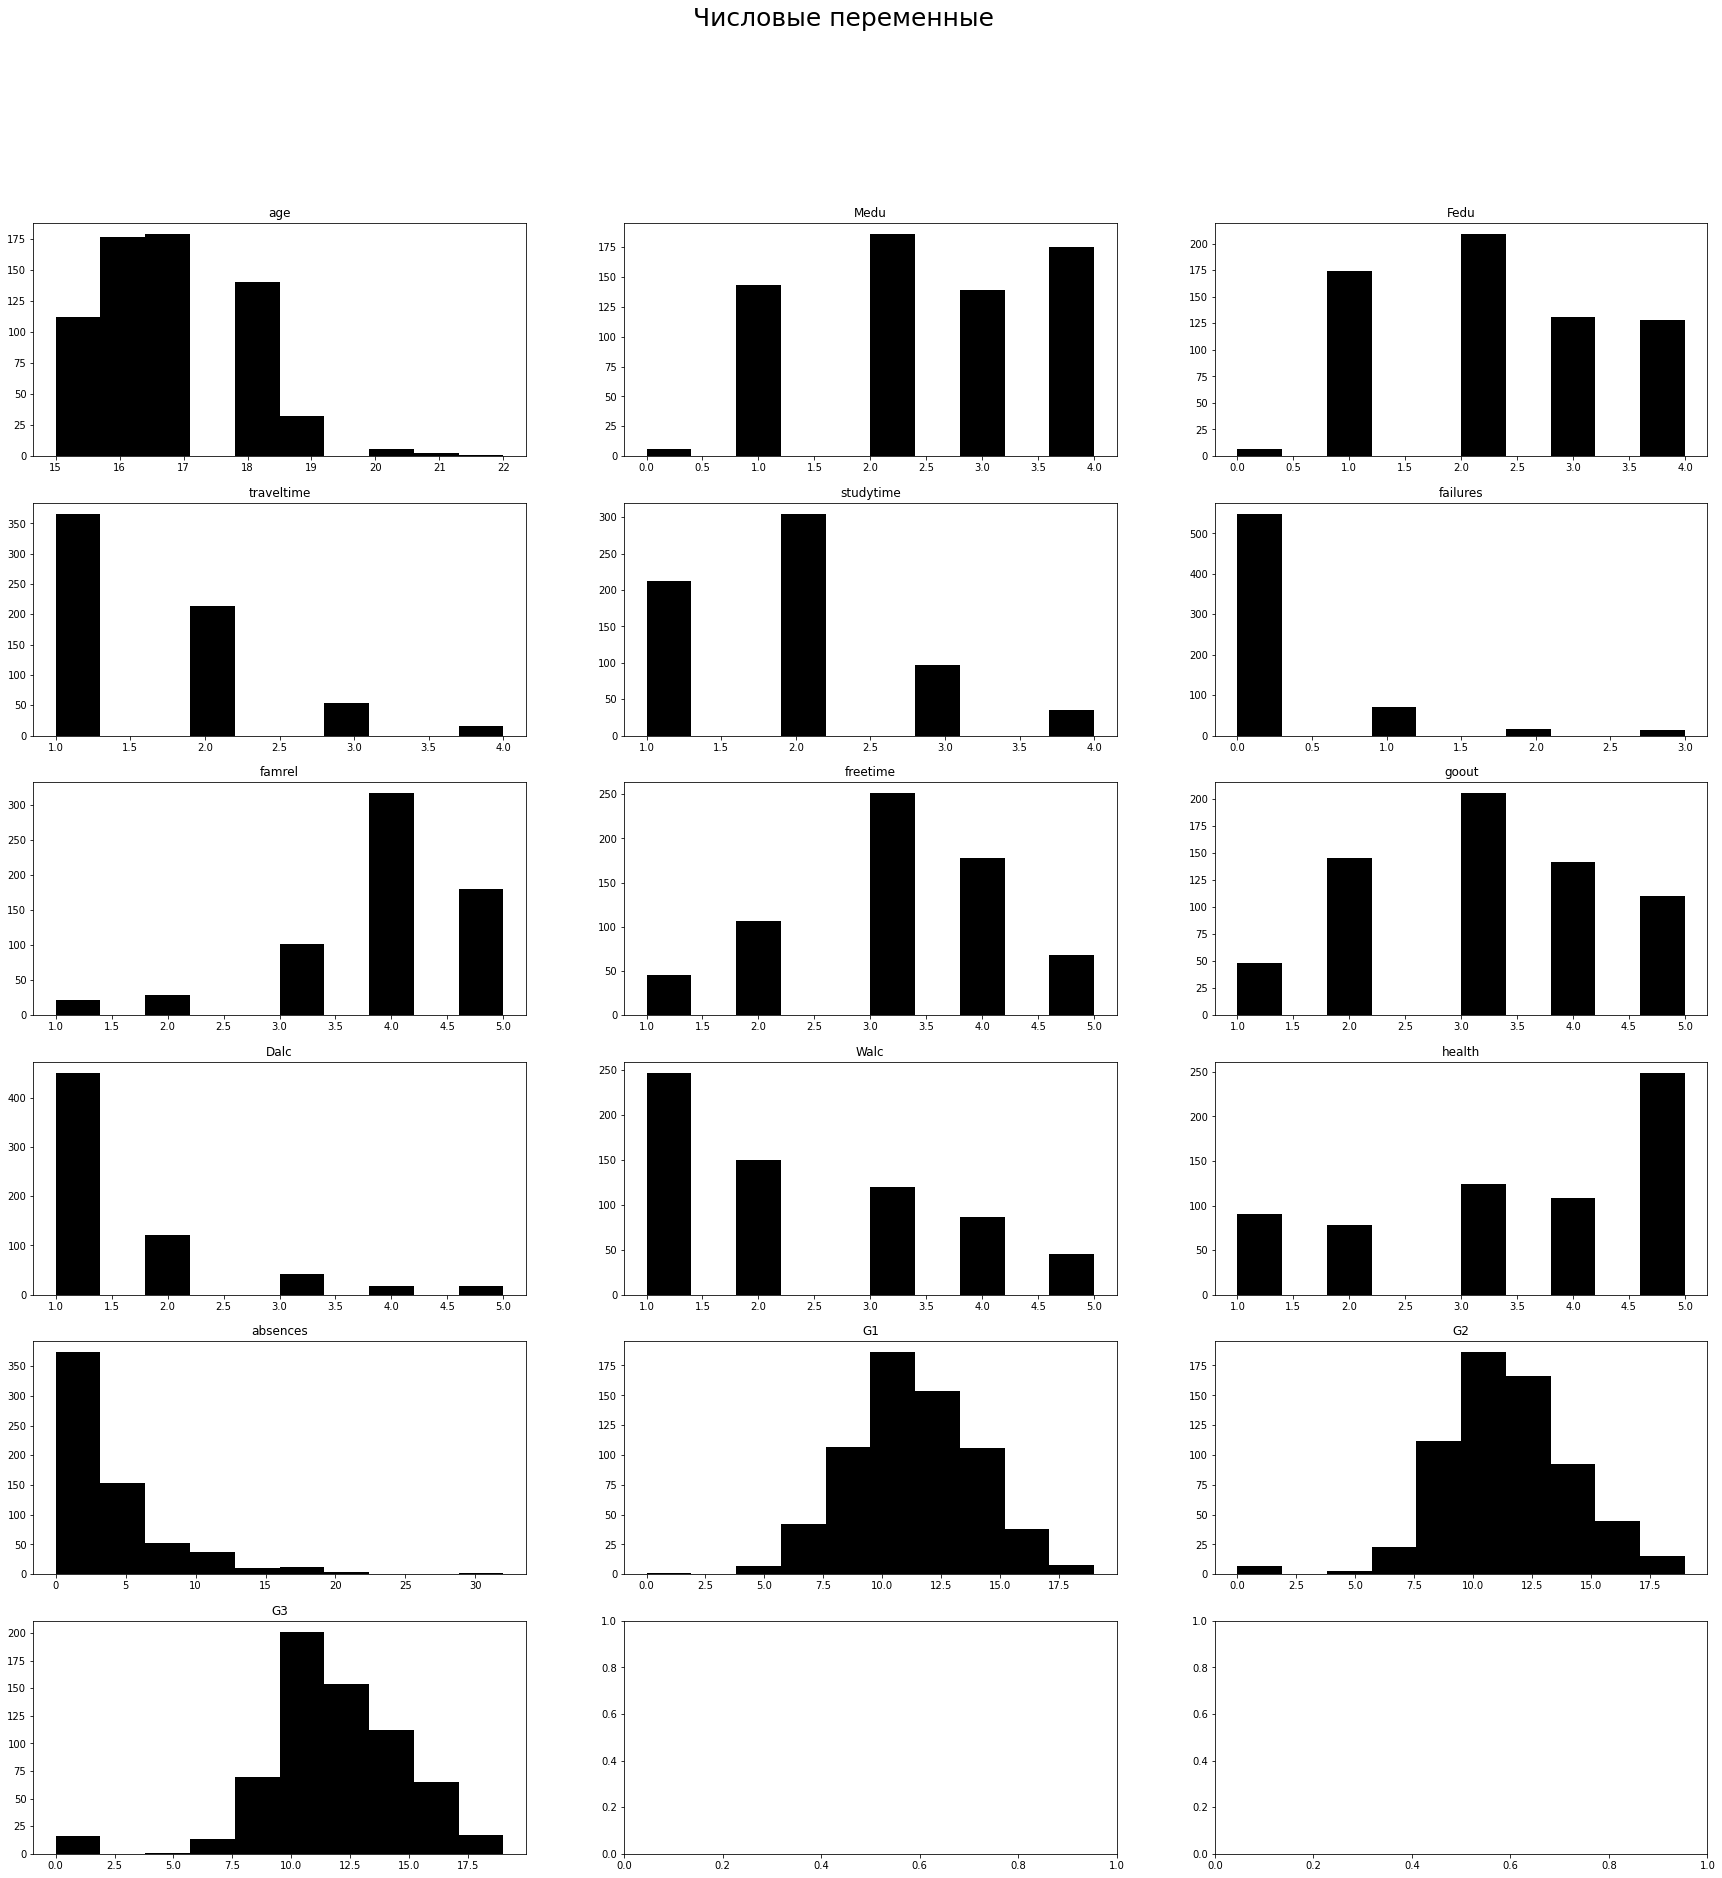

In [ ]:
num_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
fig, axs = plt.subplots(6, 3, sharex=False, sharey=False, figsize=(30, 30))
plt.suptitle('Числовые переменные', fontsize = 25)
colors = '#000000'
counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column], color = colors)
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [ ]:
df['G1'].value_counts()

10    95
11    91
12    82
13    72
14    71
9     65
8     42
15    35
7     33
16    22
17    16
6      9
18     7
5      5
4      2
0      1
19     1
Name: G1, dtype: int64

In [ ]:
df['G2'].value_counts()

11    103
12     86
10     83
13     80
9      72
14     54
8      40
15     38
16     25
17     20
7      16
18     14
6       7
0       7
5       3
19      1
Name: G2, dtype: int64

In [ ]:
df['G3'].value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: G3, dtype: int64

Целевая переменная.

In [ ]:
df['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

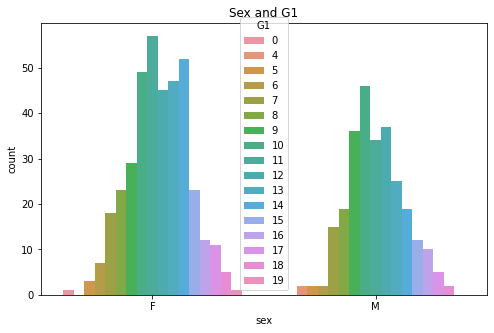

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='sex',hue='G1', data=df)
plt.title("Sex and G1")
plt.show()

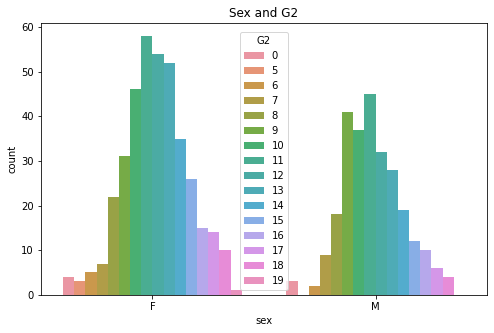

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='sex',hue='G2', data=df)
plt.title("Sex and G2")
plt.show()

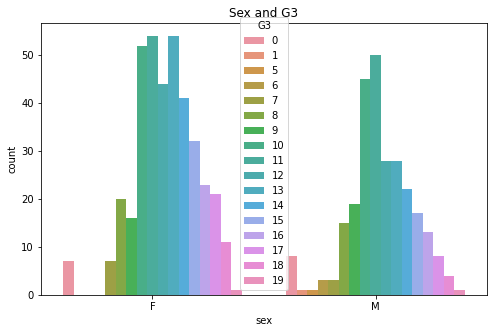

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='sex',hue='G3', data=df)
plt.title("Sex and G3")
plt.show()

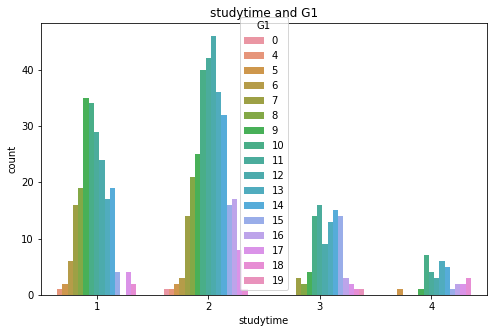

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='studytime',hue='G1', data=df)
plt.title("studytime and G1")
plt.show()

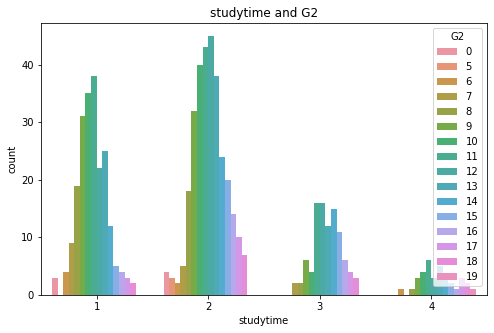

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='studytime',hue='G2', data=df)
plt.title("studytime and G2")
plt.show()

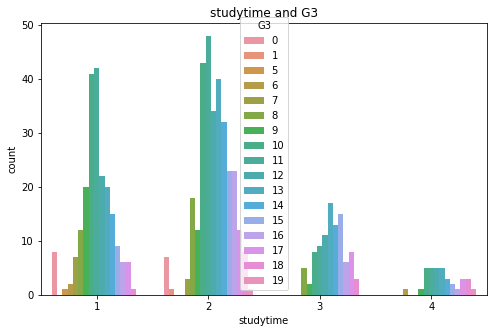

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='studytime',hue='G3', data=df)
plt.title("studytime and G3")
plt.show()

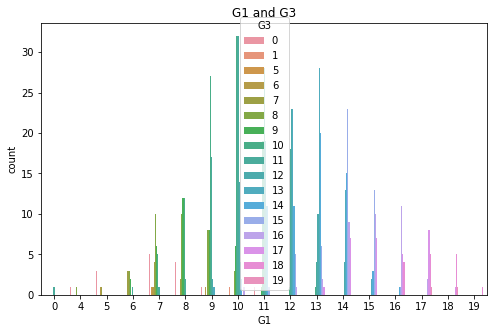

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='G1',hue='G3', data=df)
plt.title("G1 and G3")
plt.show()

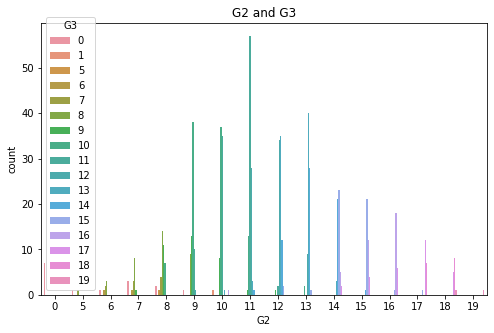

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='G2',hue='G3', data=df)
plt.title("G2 and G3")
plt.show()

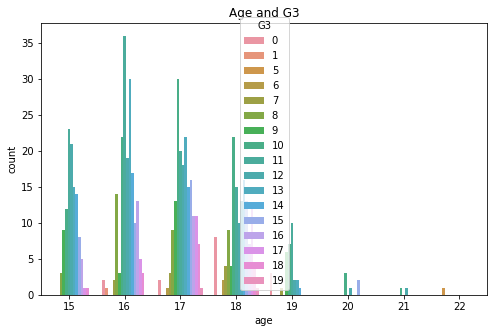

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='age',hue='G3', data=df)
plt.title("Age and G3")
plt.show()

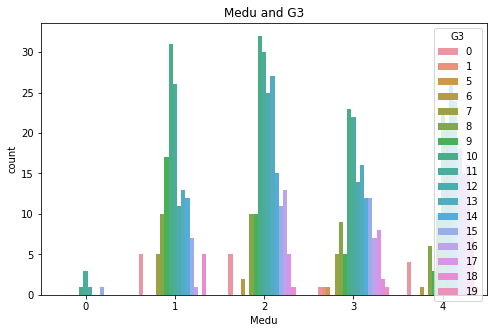

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Medu',hue='G3', data=df)
plt.title("Medu and G3")
plt.show()

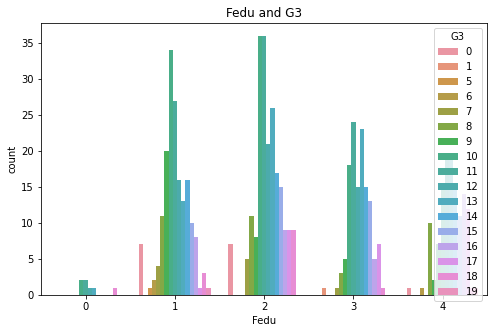

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Fedu',hue='G3', data=df)
plt.title("Fedu and G3")
plt.show()

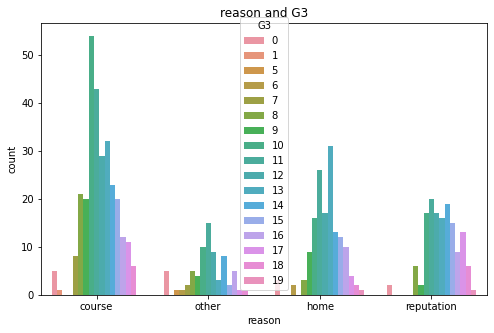

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='reason',hue='G3', data=df)
plt.title("reason and G3")
plt.show()

In [ ]:
x = df.drop('G3',axis=1)
y = df['G3']

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_

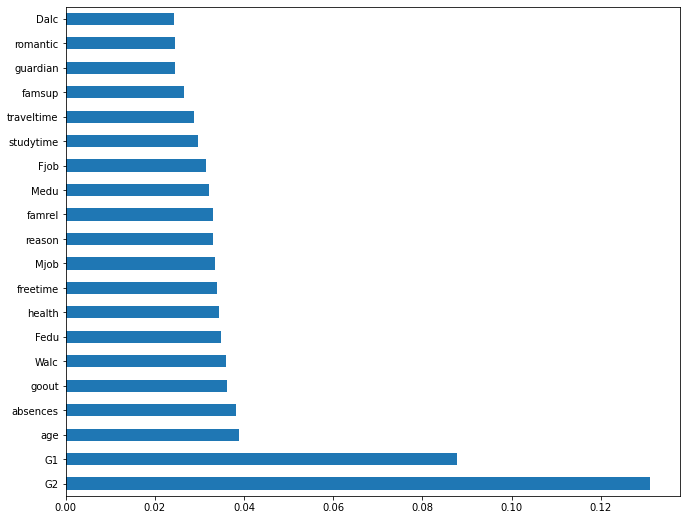

In [ ]:
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

Самые влияющие факторы на успеваемость:

* Оценка G2
* Оценка G1
* Количество пропусков в школе
* Прогулки с друзьями
* Состояние здоровья


In [ ]:
#масштабируем функцию
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

In [ ]:
ExtraTree = ExtraTreesClassifier()

ExtraTree.fit(x_scaled, y)

feature_importance = pd.Series(ExtraTree.feature_importances_, index=x.columns)
feature_importance

school        0.018915
sex           0.022655
age           0.036809
address       0.018144
famsize       0.023014
Pstatus       0.013790
Medu          0.032292
Fedu          0.034544
Mjob          0.032754
Fjob          0.031017
reason        0.031696
guardian      0.025049
traveltime    0.029139
studytime     0.029382
failures      0.017743
schoolsup     0.011763
famsup        0.024800
paid          0.008846
activities    0.023587
nursery       0.017562
higher        0.011237
internet      0.017420
romantic      0.024279
famrel        0.032153
freetime      0.036462
goout         0.036818
Dalc          0.025186
Walc          0.034534
health        0.036241
absences      0.038317
G1            0.084550
G2            0.139301
dtype: float64

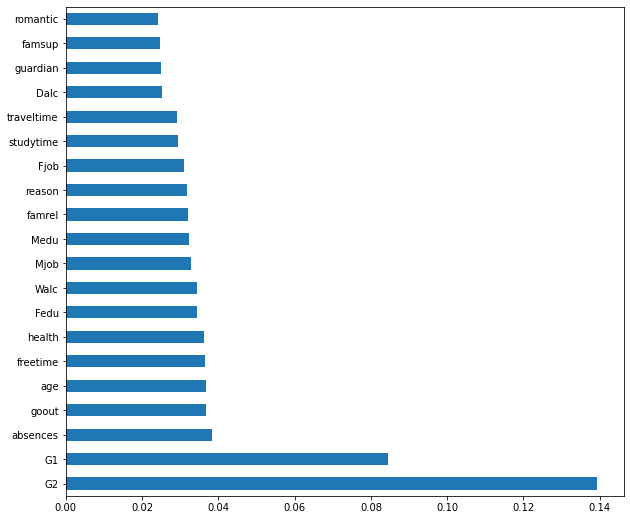

In [ ]:
plt.figure(figsize=(10,9))
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB

In [ ]:
log_clf = LogisticRegression(max_iter=10000)
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lda_clf = LDA(n_components=1)
gnb_clf = GaussianNB()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape)
print("testing shape: ",x_test.shape)

training shape:  (486, 32)
testing shape:  (163, 32)


In [ ]:
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf, lda_clf, gnb_clf]:
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.7361963190184049
SVC   0.6134969325153374
KNeighborsClassifier   0.6748466257668712
DecisionTreeClassifier   0.6871165644171779
RandomForestClassifier   0.8957055214723927
LinearDiscriminantAnalysis   0.7975460122699386
GaussianNB   0.26993865030674846


Лучше всех себя показал "случайный лес". Построим ансамбль моделей.

In [ ]:
from sklearn.ensemble import VotingClassifier

voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf),('lda',lda_clf),('gnb',gnb_clf)])

voting_clf.fit(x_train,y_train)

y_pred = voting_clf.predict(x_test)
print("acuracy: ",accuracy_score(y_test,y_pred))

acuracy:  0.8343558282208589


In [ ]:
#попробуем тоже самое с масштабированными данными
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("training shape: ",x_train_scaled.shape)
print("testing shape: ",x_test_scaled.shape)

training shape:  (486, 32)
testing shape:  (163, 32)


In [ ]:
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf, lda_clf, gnb_clf]:
    clf.fit(x_train_scaled, y_train_scaled)
    
    pred = clf.predict(x_test_scaled)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.4171779141104294
SVC   0.34355828220858897
KNeighborsClassifier   0.294478527607362
DecisionTreeClassifier   0.7116564417177914
RandomForestClassifier   0.7607361963190185
LinearDiscriminantAnalysis   0.7975460122699386
GaussianNB   0.22085889570552147


In [ ]:
voting_clf =VotingClassifier([('lgclf',log_clf),('svc',svc_clf),('knn',knn_clf),('dt',dt_clf),('rf',rf_clf),('lda',lda_clf),('gnb',gnb_clf)])

voting_clf.fit(x_train_scaled,y_train_scaled)

y_pred = voting_clf.predict(x_test_scaled)
print("acuracy: ",accuracy_score(y_test_scaled,y_pred))

acuracy:  0.7239263803680982


Теперь попробуем более "продвинутые" алгоритмы: Adaboost и Xgboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
boost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=500, algorithm='SAMME',learning_rate=0.01)

boost.fit(x_train_scaled,y_train_scaled)

predictions = boost.predict(x_test_scaled)

print("accuracy:",accuracy_score(y_test,predictions))

accuracy: 0.4785276073619632


In [ ]:
xgb = XGBClassifier()

xgb.fit(x_train_scaled, y_train_scaled)

prediction = xgb.predict(x_test_scaled)

print("accuracy: ",accuracy_score(y_test,prediction))

accuracy:  0.8834355828220859


Результат получился хуже, чем "случайный лес"

Итог:

* Проанализировали корреляцию данных и выявили наиболее влияющие на увольнение параметры
* Применили классические алгоритмы машинного обучения
* Использовали масштабирование данных
* Использовали ансамбли моделей
* Использовали более сложные реализации алгоритмов

Лучший результат дал "случайный лес" на масштабированных данных: 0.460